In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np 

from multicam.tng.utils import convert_tng_mass

from tqdm import tqdm

## Extract data

In [2]:
def convert_tng_mass2(gmass):
    """Convert TNG mass to log10(Msun)."""
    # TNG units are 1e10 Msun / h; https://www.tng-project.org/data/docs/specifications
    # return in units of log10(Msun)
    # robust to 0 mass
    return np.where(gmass > 0, np.log10(gmass * 1e10), 0)


In [23]:
# get gmass over all files 
subhalo_ids = []
subhalo_mass = []
stellar_mass = []
group_mass = [] 
hat_group_mass = [] 
gr_nums = [] 

count = 0
for ii in tqdm(range(0, 448)):
    filename = f'../data/tng/tng100-99/fof_subhalo_tab_099.{ii}.hdf5'
    with h5py.File(filename, 'r') as f:

        if 'GroupMass' in f['Group'].keys():
            for s in f['Group']['GroupMass']:
                group_mass.append(s)
            for s in f['Group']['Group_M_TopHat200']:
                hat_group_mass.append(s)
            

        if 'SubhaloMass' in f['Subhalo'].keys():
            for s in f['Subhalo']['SubhaloMass']:
                subhalo_ids.append(count)
                subhalo_mass.append(s)
                count+=1


            for s in f['Subhalo']['SubhaloMassInRadType'][:,4]: # 4 = star particles
                stellar_mass.append(s) 

            for s in f['Subhalo']['SubhaloGrNr']:
                gr_nums.append(s)


subhalo_ids = np.array(subhalo_ids)
subhalo_mass = convert_tng_mass2(np.array(subhalo_mass)) # log10(Msun / h)
stellar_mass = convert_tng_mass2(np.array(stellar_mass)) # log10(Msun / h)
group_mass = convert_tng_mass2(np.array(group_mass))
hat_group_mass = convert_tng_mass2(np.array(hat_group_mass))
gr_nums = np.array(gr_nums)

100%|██████████| 448/448 [00:44<00:00, 10.00it/s]
/var/folders/yl/5w7yl6bn1tsc5fjrdtsrsjhh0000gn/T/ipykernel_83509/411574188.py:6: RuntimeWarning: divide by zero encountered in log10
  return np.where(gmass > 0, np.log10(gmass * 1e10), 0)


# Histograms

In [24]:
import matplotlib.pyplot as plt 

In [25]:
hat_group_mass.shape, group_mass.shape, subhalo_mass.shape

((6291349,), (6291349,), (4371211,))

In [20]:
sum(hat_group_mass==0), sum(group_mass==0)

(np.int64(2862632), np.int64(0))

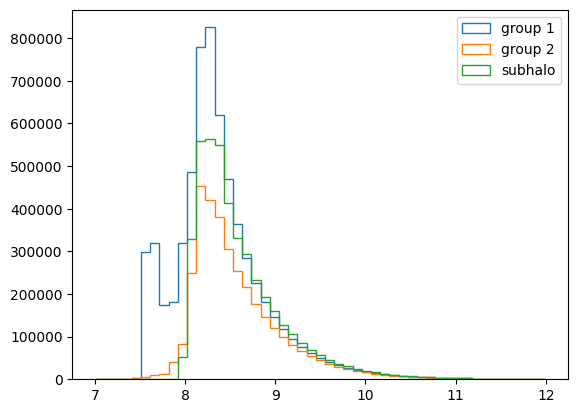

In [22]:
bins = np.linspace(7, 12, 50)
plt.hist(group_mass, bins=bins, histtype='step', label='group 1')
plt.hist(hat_group_mass, bins=bins, histtype='step', label='group 2')
plt.hist(subhalo_mass, bins=bins, histtype='step', label='subhalo')
plt.legend()

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00, 2.0000e+01,
        1.1600e+02, 1.2450e+03, 1.1921e+04, 2.5202e+04, 2.0707e+04,
        1.8231e+04, 1.5514e+04, 1.3276e+04, 1.1275e+04, 9.8470e+03,
        8.7130e+03, 7.6520e+03, 6.9440e+03, 6.1830e+03, 5.8980e+03,
        5.3430e+03, 5.0190e+03, 4.7910e+03, 4.3750e+03, 4.0820e+03,
        3.6590e+03, 3.3710e+03, 3.0200e+03, 2.6580e+03, 2.2810e+03,
        1.9530e+03, 1.5530e+03, 1.4740e+03, 1.2920e+03, 1.0760e+03,
        9.6500e+02, 9.5400e+02, 8.3400e+02, 5.1000e+02, 3.6500e+02,
        2.1900e+02, 1.4100e+02, 9.1000e+01, 5.6000e+01, 4.3000e+01,
        2.2000e+01, 2.0000e+01, 6.0000e+00, 5.0000e+00]),
 array([ 5.        ,  5.14285714,  5.28571429,  5.42857143,  5.57142857,
         5.71428571,  5.85714286,  6.        ,  6.14285714,  6.28571429,
         6.42857143,  6.57142857,  6.71428571,  6.85714286,  7.        ,
         7.14285714,  7.28571429,  7.42857143,  7.57142857,  7.71428571,
         7.85714286,  8.        ,  8.1

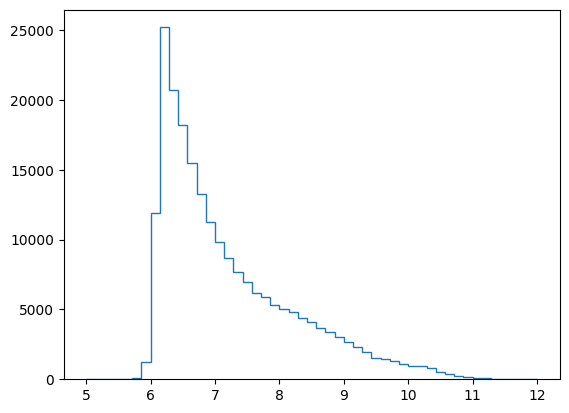

In [30]:
bins = np.linspace(5, 12, 50)

plt.hist(stellar_mass, bins=bins, histtype='step')